В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df_cars = pd.read_csv('cars.csv')

In [3]:
df_cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
#?pd.DataFrame.info

In [5]:
df_cars.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
df_cars.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Спостереження: Маємо колонку ID, яку можна замінити на тип object або видалити в подальшому при необхідності, так як вона не має саме числового значення для прорахунків, а є інформаційним індексом 


In [7]:
#df_cars['Car_ID'] = df_cars['Car_ID'].astype("str")

In [8]:
#Перевіримо числові колоноки та к-ть унікальних значень в них
df_cars_num = df_cars.select_dtypes(include = 'number').columns

for column in df_cars_num:
    print(column, '-', df_cars[column].nunique())

Car_ID - 100
Year - 6
Kilometers_Driven - 18
Mileage - 15
Engine - 36
Power - 40
Seats - 3
Price - 31


In [9]:
#Перевіримо, категоріальні дані та який саме тип містять object
df_cars_obj = df_cars.select_dtypes(include = 'object').columns

print ('тип даних object')
for column in df_cars_obj:
    print (df_cars[column].apply(type).value_counts())


тип даних object
Brand
<class 'str'>    100
Name: count, dtype: int64
Model
<class 'str'>    100
Name: count, dtype: int64
Fuel_Type
<class 'str'>    100
Name: count, dtype: int64
Transmission
<class 'str'>    100
Name: count, dtype: int64
Owner_Type
<class 'str'>    100
Name: count, dtype: int64


In [10]:
#Порахуємо унікальні значення в кожній колонці 
for column in df_cars_obj:
    print(column, '-', df_cars[column].nunique())

Brand - 11
Model - 58
Fuel_Type - 2
Transmission - 2
Owner_Type - 3


In [11]:
#Превіримо чи колонки є бінарнимии 
for column in df_cars_obj:
    if df_cars[column].nunique() == 2 : print (column, ' - бінарна' )

Fuel_Type  - бінарна
Transmission  - бінарна


In [12]:
#Перевіримо чи мультикатегоріальна має залежності між собою, виведемо дані та оцінимо їх 
for column in df_cars_obj:
    if 2 < df_cars[column].nunique() < 10: print (column, df_cars[column].unique())

Owner_Type ['First' 'Second' 'Third']


In [13]:
#перевіримо колонки, які мають більше 10 значень, чи мають вони залежності 
for column in df_cars_obj:
    if df_cars[column].nunique() > 10: print (column, df_cars[column].unique())

Brand ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Model ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']


Поточний дата фрейм 100 рядків та 13 колонок і всі значення в ньому заповнені.

Маємо 8 числових і 5 категоріальних колонок типу string, з них:
- 2 бінарні - Fuel_Type, Transmission
- 2 мультикатегоріальних зі значеннями, для яких немає відношення порядку - Brand, Model
- 1 колонки, в якійй можна встановити відношення порядку Owner_Type - (['First' 'Second' 'Third'])


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [14]:
#Означимо наші дані та таргер
inputs = df_cars.drop(columns=['Price']) 
targets = df_cars['Price'] 

In [15]:
#Створення тестового набору
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

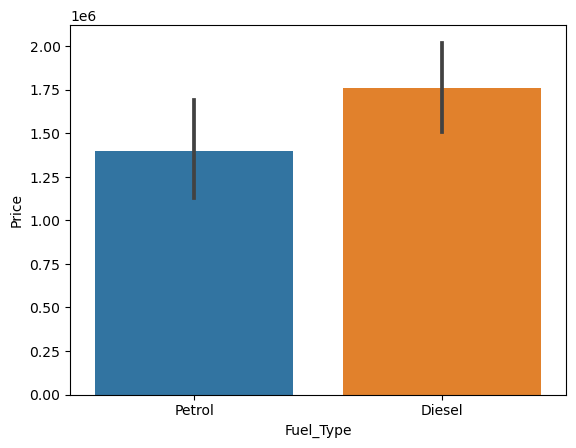

In [16]:
#1 кодуємо колонки з бінарними значеннями - Fuel_Type і Transmission
sns.barplot(data=df_cars, x='Fuel_Type', y='Price');

In [17]:
Fuel_Type_Code = {'Petrol': 0, 'Diesel': 1}
X_train['Fuel_Type_Code'] = X_train.Fuel_Type.map(Fuel_Type_Code)
X_test['Fuel_Type_Code'] = X_test.Fuel_Type.map(Fuel_Type_Code)

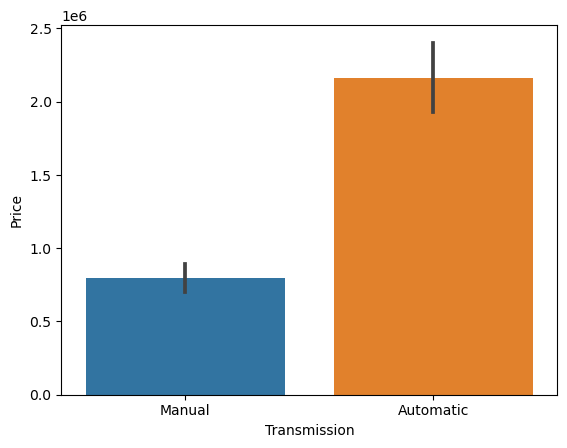

In [18]:
sns.barplot(data=df_cars, x='Transmission', y='Price');

In [19]:
Transmission_code = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_code'] = X_train.Transmission.map(Transmission_code)
X_test['Transmission_code'] = X_test.Transmission.map(Transmission_code)

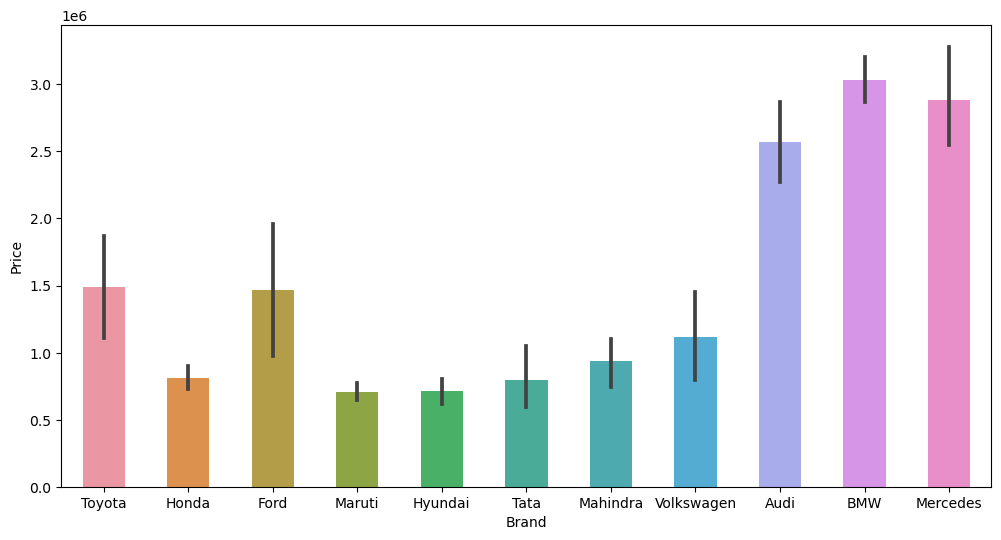

In [20]:
#2 Кодуємо колонку Brand 

plt.figure(figsize=(12, 6))
sns.barplot(data=df_cars, x='Brand', width=0.5, y='Price');

In [21]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [22]:
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()


In [23]:
#3 Кодуємо колонку Owner_Type

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [24]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Спостереження: щодо колонки моделей можна було б погрупувати модель по типу авто, наприклад:

кросовер, седан, спорт кар, купе, універсал

знаючи ці моделі 
Model ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']

 але я не впевнена в правильності такого підходу, було б цікаво зрозуміти рішення 

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [25]:
#Видалимо всі категоріальні колонки, так як перетворили їх і вони не будуть брати участь в процесі 

X_train_df = X_train.drop(columns=X_train.select_dtypes(include='object'))
X_test_df = X_test.drop(columns=X_test.select_dtypes(include='object'))

train_df = pd.concat([X_train_df, y_train], axis=1)
test_df = pd.concat([X_test_df, y_test], axis=1)

In [26]:
#Виведем матрицю кореляції
corr = train_df.corr()
corr.style.background_gradient()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,-0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,-0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,-0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_Code,-0.090537,-0.248515,0.332351,0.070112,0.174455,-0.076357,0.412468,1.000000,0.005775,0.008336,0.048475,-0.109812,0.161425,0.007121,0.235225,-0.148511,0.048475,-0.066164,0.008336,-0.125010,-0.281122,0.110782
Transmission_code,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858


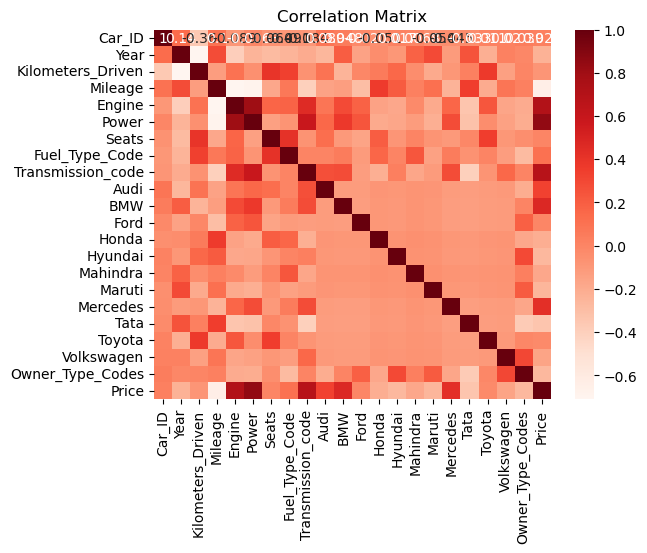

In [27]:
sns.heatmap(corr, cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [28]:
#Обрахуємо кореляцію відносно таргету 
train_df_corr = train_df.corr()['Price'].sort_values(ascending=False)
train_df_corr

Price                1.000000
Power                0.849137
Engine               0.710561
Transmission_code    0.680731
BMW                  0.477522
Mercedes             0.431606
Audi                 0.328858
Fuel_Type_Code       0.110782
Car_ID               0.025560
Seats                0.000979
Ford                -0.004592
Toyota              -0.023778
Kilometers_Driven   -0.083951
Volkswagen          -0.158742
Mahindra            -0.178627
Honda               -0.209779
Year                -0.233769
Maruti              -0.249737
Hyundai             -0.263022
Owner_Type_Codes    -0.265537
Tata                -0.341815
Mileage             -0.638404
Name: Price, dtype: float64

In [29]:
#Визначимо тільки колонки, які гарно корелюють то цільової змінної
train_df_corr[train_df_corr.abs()>0.5].index.tolist()

['Price', 'Power', 'Engine', 'Transmission_code', 'Mileage']

з даного аналізу бачимо, що 'Power', 'Engine', 'Transmission_code', 'Mileage' мають найбільший вплив на 'Price'

зі збільшенням показників 'Power', 'Engine', 'Transmission_code' зростає 'Price'

зі збільшенням 'Mileage' зменшується 'Price'

що відповідає логічним очікуванням, отже переходимо до подальшого аналізу

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [30]:
model = LinearRegression()
model.fit(X_train_df, y_train)

LinearRegression()

In [31]:
predictions_train = model.predict(X_train_df)
loss = mean_squared_error(y_train, predictions_train, squared=False)
print('Training Loss:', loss)

Training Loss: 210293.5782815186


In [32]:
predictions_test = model.predict(X_test_df)
loss = mean_squared_error(y_test, predictions_test, squared=False)
print('Test Loss:', loss)

Test Loss: 258181.56112032803


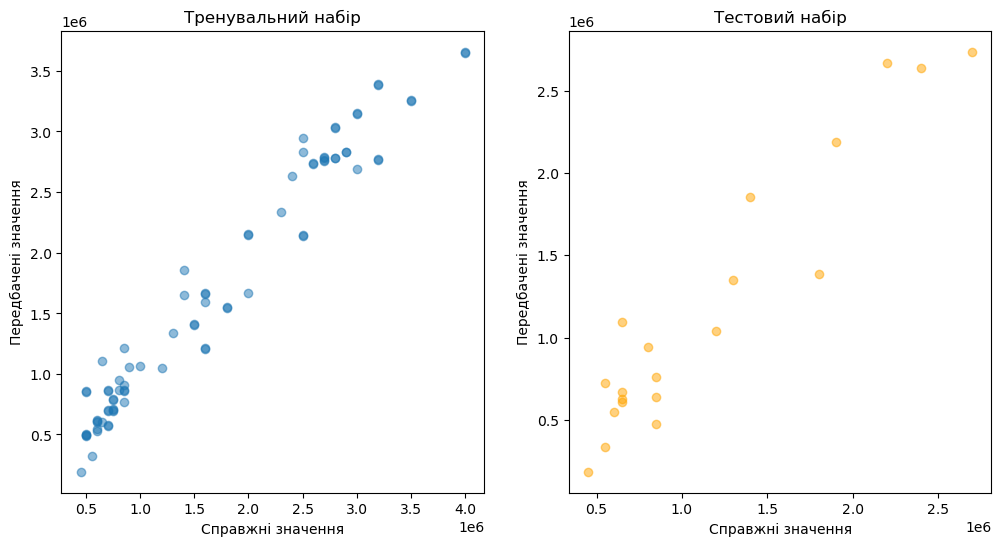

In [33]:
# Графік розсіювання для тренувальних даних
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions_train, alpha=0.5)
plt.xlabel('Справжні значення')
plt.ylabel('Передбачені значення')
plt.title('Тренувальний набір')

# Графік розсіювання для тестових даних
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_test, alpha=0.5, color='orange')
plt.xlabel('Справжні значення')
plt.ylabel('Передбачені значення')
plt.title('Тестовий набір')

plt.show()

RMSE велика, але значення для тренувальних даних та тестових даних дуже близькі за значенням, 
це може свідчити про те, що модель добре натренована для визначення нових даних.

За графіком розсіювання ми також бачимо, що дані розташовані в схожих напрямках і лінійно залежні 
і це також свідчить, що модель може добре передбачати дані.

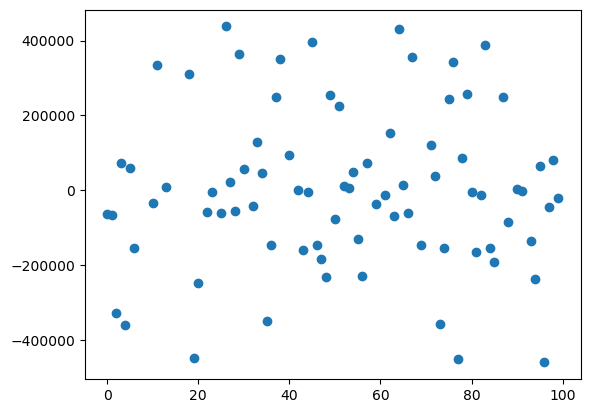

In [34]:
errors_train = y_train - predictions_train
plt.plot(errors_train, 'o')

(array([ 3.,  4.,  5., 11., 16., 19.,  6.,  6.,  3.,  7.]),
 array([-460551.36398708, -370709.06390671, -280866.76382634,
        -191024.46374598, -101182.16366561,  -11339.86358524,
          78502.43649512,  168344.73657549,  258187.03665585,
         348029.33673622,  437871.63681659]),
 <BarContainer object of 10 artists>)

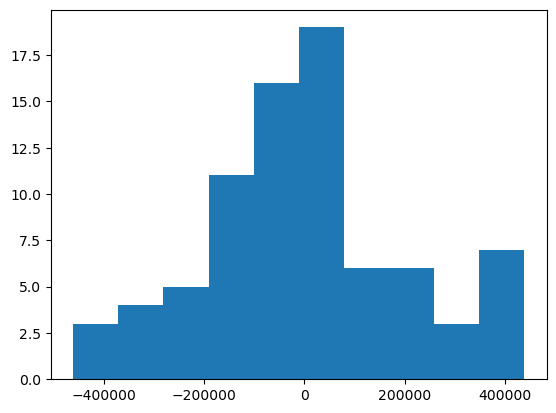

In [35]:
plt.hist(errors_train)

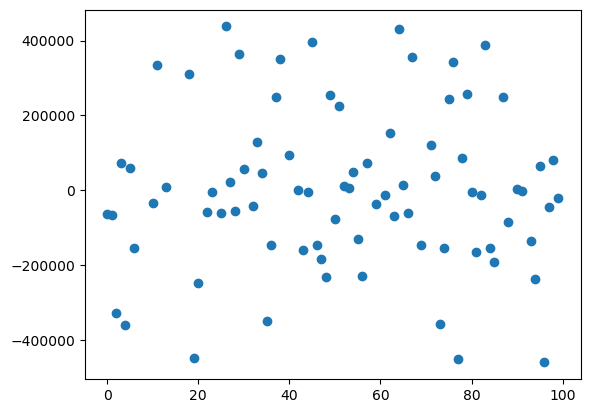

In [36]:
errors_test = y_test - predictions_test
plt.plot(errors_train, 'o')

(array([3., 0., 2., 2., 2., 4., 1., 3., 1., 2.]),
 array([-468811.09735576, -380490.76868006, -292170.44000435,
        -203850.11132865, -115529.78265294,  -27209.45397724,
          61110.87469847,  149431.20337417,  237751.53204988,
         326071.86072558,  414392.18940129]),
 <BarContainer object of 10 artists>)

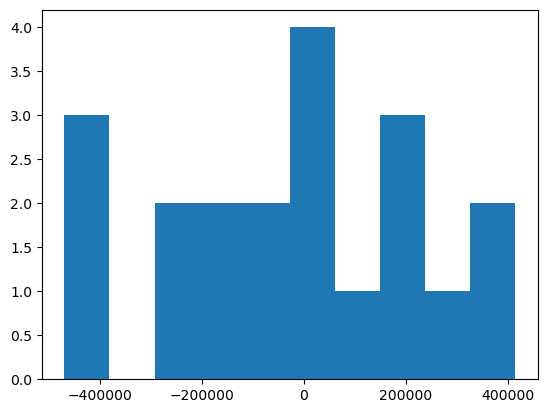

In [37]:
plt.hist(errors_test)

Помилки не зовсім нормальні і це означає, що є куди покращувати модель.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [38]:
scaler = StandardScaler()
scaler.fit(X_train_df)

StandardScaler()

In [39]:
X_train_scaled = scaler.transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

In [40]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
model.coef_

array([   5608.68542149,   -8765.64571392,  -94398.72148597,
       -131715.51202972,  -21377.45333789,  496769.21489874,
         -2148.92454899,  183848.01890892,  116693.76820576,
        205600.14776875,  208407.31378257, -118209.45031066,
        -62753.005386  , -152304.86391146, -140945.16290405,
       -112259.96701985,  210048.78114763,  -65996.24697212,
         15805.70151142,  -92968.2600652 ,   42344.95281544])

In [42]:
model.intercept_

1680000.0000000002

In [43]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train_df.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values(by='weight', ascending=False).head()

,feature,weight
21,1,1.680000e+06
5,Power,4.967692e+05
16,Mercedes,2.100488e+05
10,BMW,2.084073e+05
9,Audi,2.056001e+05


В даному аналізі спостерігаюмо, що модель визначає, якщо всі значення рівні 0, то Прайс буде  = 1680000

Якщо якесь із значень буде збільшуватись на 1, то Прайс буде збільшуватись чи зменшуватись відповідно до коефіцієнтів певних колонки  - array([   5608.68542149,   -8765.64571392,  -94398.72148597,
       -131715.51202972,  -21377.45333789,  496769.21489874,
         -2148.92454899,  183848.01890892,  116693.76820576,
        205600.14776875,  208407.31378257, -118209.45031066,
        -62753.005386  , -152304.86391146, -140945.16290405,
       -112259.96701985,  210048.78114763,  -65996.24697212,
         15805.70151142,  -92968.2600652 ,   42344.95281544])

І найвливовішими колонками є Power, Mercedes, BMW, Audi
         


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [51]:
Y = y_train
X = X_train_df
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [52]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           2.01e-33
Time:                        19:59:24   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.56e+07   1.01e+0

In [53]:
p_values = results.pvalues 
significant_index = p_values[p_values < 0.05].index
significant_index

Index(['Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_code'], dtype='object')

Проаналізувавши p-value коефіцієнти. 

'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_code'

є стат значущими на рівні значущості 0.05, тобто змінна має значний вплив на залежну змінну

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [54]:
X_train_significant = X_train[significant_index]
X_train_significant

,Mileage,Power,Fuel_Type_Code,Transmission_code
83,18,148,0,1
55,17,187,1,1
26,15,241,0,1
54,18,103,0,0
19,12,241,0,1
...,...,...,...,...
3,23,74,1,0
2,10,395,0,1
6,15,140,1,1
27,18,187,1,1


In [55]:
Y = y_train
X_2 = X_train_significant
X_2 = sm.add_constant(X_2)
model_2 = sm.OLS(Y,X_2)
results_2 = model_2.fit()

In [56]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     77.42
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           7.36e-26
Time:                        19:59:47   Log-Likelihood:                -1156.0
No. Observations:                  80   AIC:                             2322.
Df Residuals:                      75   BIC:                             2334.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.287e+05   4.81e+0

Чи значно змінились R2 і Adj. R-squared?

в першому випадку
R-squared:                       0.959
Adj. R-squared:                  0.945

в другому випадку 
R-squared:                       0.805
Adj. R-squared:                  0.795

значення не значно знизились і це свідчить, що обрані ознаки є достатніми для тренування моделі в майбутньому, але можливо краще додати ще декілька для покращення моделі

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [58]:
X_train_p_25 = X_train[p_values[p_values < 0.25].index]

,Kilometers_Driven,Mileage,Power,Fuel_Type_Code,Transmission_code
83,22000,18,148,0,1
55,28000,17,187,1,1
26,28000,15,241,0,1
54,32000,18,103,0,0
19,26000,12,241,0,1
...,...,...,...,...,...
3,30000,23,74,1,0
2,20000,10,395,0,1
6,45000,15,140,1,1
27,22000,18,187,1,1


In [61]:
Y = y_train
X_3 = X_train_p_25
X_3 = sm.add_constant(X_3)
model_3 = sm.OLS(Y,X_3)
results_3 = model_3.fit()

In [63]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     65.86
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           7.50e-26
Time:                        20:10:30   Log-Likelihood:                -1153.6
No. Observations:                  80   AIC:                             2319.
Df Residuals:                      74   BIC:                             2333.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.03e+06   5.47e+0

Чи значно змінились R2 і Adj. R-squared порівняно з попереднім? Яку модель з останніх 3х завдань ви б лишили для використання?


в першому випадку
R-squared:                       0.959
Adj. R-squared:                  0.945

в другому випадку 
R-squared:                       0.805
Adj. R-squared:                  0.795

В третьому випадку 
R-squared:                       0.817
Adj. R-squared:                  0.804

Модель з першим набором даних показує найкращі результати,
так як ми маємо невеликий набір значень я б залишила всі для тренування моделі, щоб отримати гарний результат , або третій, щоб зменшити ризики того що нові дані не будуть мати точних значень з тренувального наббору